In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape

## Data Loading

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

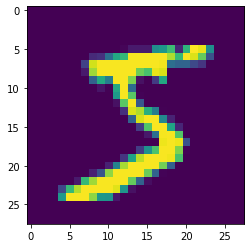

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
only_zeros = X_train[y_train == 0]

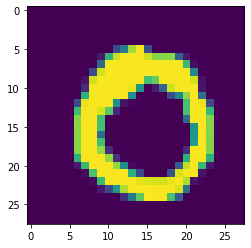

In [10]:
plt.imshow(only_zeros[5])

In [11]:
only_zeros.shape

(5923, 28, 28)

## Generator and Discriminator

In [15]:
discriminator = Sequential()

discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [16]:
codings_size = 100

generator = Sequential()

generator.add(Dense(100,activation='relu',input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

In [17]:
GAN = Sequential([generator,discriminator])

discriminator.trainable = False

GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [18]:
batch_size = 32

my_data = only_zeros
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [20]:
dataset = dataset.batch(batch_size=batch_size,drop_remainder=True).prefetch(1)

In [21]:
epochs = 1

In [27]:
GAN.layers[0].summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [28]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 265,902
Trainable params: 132,951
Non-trainable params: 132,951
_________________________________________________________________


## Trainig GAN

In [31]:
generator,discriminator = GAN.layers

for epoch in range(epochs):
    
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    
    for X_batch in dataset:
        
        i =+1
        
        if i % 100 == 0:
            print(f"\t Currently on batch number {i} {len(my_data//batch_size)}")
        
        # DISCRIMINATOR TRAINING PHASE
        
        noise = tf.random.normal(shape=[batch_size,codings_size])
        
        gen_images = generator(noise)
        
        X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
        
        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
        
        discriminator.trainable = True
        
        discriminator.train_on_batch(X_fake_vs_real,y1)
        
        # TRAIN GENERATOR
        
        noise = tf.random.normal(shape=[batch_size,codings_size])
        
        y2 = tf.constant([[1.0]]*batch_size)
        discriminator.trainable = False
        GAN.train_on_batch(noise,y2)


Currently on Epoch 1


In [32]:
noise = tf.random.normal(shape=[10,codings_size])

In [33]:
noise.shape

TensorShape([10, 100])

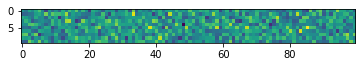

In [34]:
plt.imshow(noise)

In [35]:
images = generator(noise)
images.shape

TensorShape([10, 28, 28])

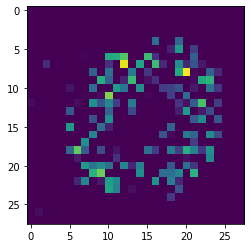

In [39]:
plt.imshow(images[0])

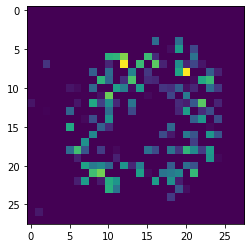

In [40]:
plt.imshow(images[1])